<a href="https://colab.research.google.com/github/ZarinSaima333/Bracu_CSE428_Image_processing/blob/main/Roza_CSE_428_Lab_6_CNN_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


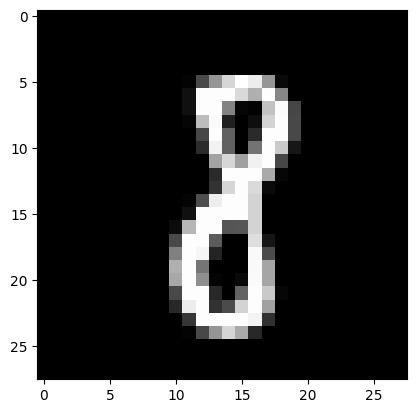

Label:  8
Max value:  255


In [ ]:
sample_id = np.random.randint(60000)
plt.imshow(x_train[sample_id], cmap="gray")
plt.show()
print("Label: ", y_train[sample_id])
print("Max value: ", np.max(x_train[sample_id]))

In [ ]:
num_classes = 10

x_train = x_train / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)

x_test = x_test / 255.0
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

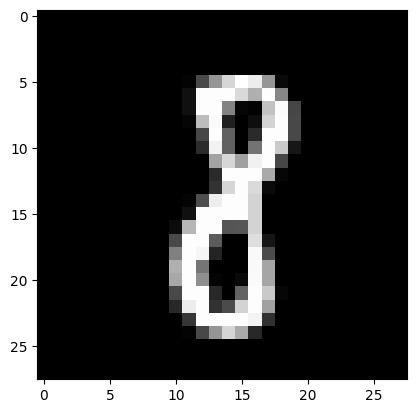

Label:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Max value:  1.0


In [ ]:
plt.imshow(x_train[sample_id], cmap="gray")
plt.show()
print("Label: ", y_train[sample_id])
print("Max value: ", np.max(x_train[sample_id]))

In [ ]:
#converting 2D image to 3D volume

x_train = np.expand_dims(x_train, axis=-1) # (28, 28) -> (28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1) # (28, 28) -> (28, 28, 1)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [ ]:
img_rows, img_cols = 28, 28
num_channels = 1
input_shape = (img_rows, img_cols, num_channels)

In [ ]:
14*14*16

3136

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(16, (5, 5),
                                 strides=(1, 1),
                                 activation='relu',
                                 padding='same',
                                 input_shape=input_shape,
                                 name="cse428"))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(tf.keras.layers.Flatten())
#>>>>>>>>>>>> 3136
model.add(tf.keras.layers.Dense(100, activation='relu'))
#>>>>>>>>>>>> 313600 connections: shape here 100
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=250, verbose=1, validation_data=(x_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4680 - accuracy: 0.8683 - val_loss: 0.2538 - val_accuracy: 0.9221
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1978 - accuracy: 0.9417 - val_loss: 0.1508 - val_accuracy: 0.9564
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1459 - accuracy: 0.9567 - val_loss: 0.1180 - val_accuracy: 0.9668
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1159 - accuracy: 0.9661 - val_loss: 0.1000 - val_accuracy: 0.9702
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0968 - accuracy: 0.9713 - val_loss: 0.0817 - val_accuracy: 0.9761
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0834 - accuracy: 0.9750 - val_loss: 0.0781 - val_accuracy: 0.9766
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0726 - accuracy: 0.9780 - val_loss: 0.0681 - val_accuracy

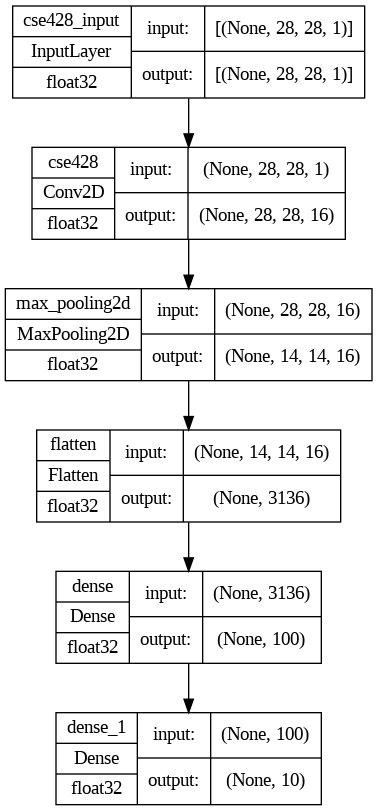

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)